# Basic data analysis or exploratory data analysis (EDA)
https://github.com/jalajthanaki/credit-risk-modelling/blob/master/Credit%20Risk%20Analysis.ipynb

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('F:/Machine-Learning-Projects-master/credit_risk_evaluation/cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [3]:
# print the 5 records of the traiing dataset
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [6]:
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [7]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

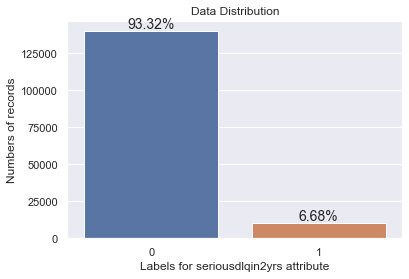

In [8]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

## Missing values

In [9]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

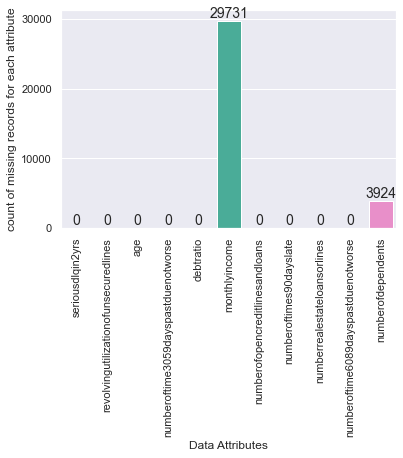

In [10]:
# Graphical representation of the missing values.
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Actual replacement of the missing value using mean value.
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [13]:
# Actual replacement of the missing value using median value.
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [14]:
training_data_median_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

## Correlation

In [15]:
training_data.fillna((training_data.median()), inplace=True)
# Get the correlation of the training dataset
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


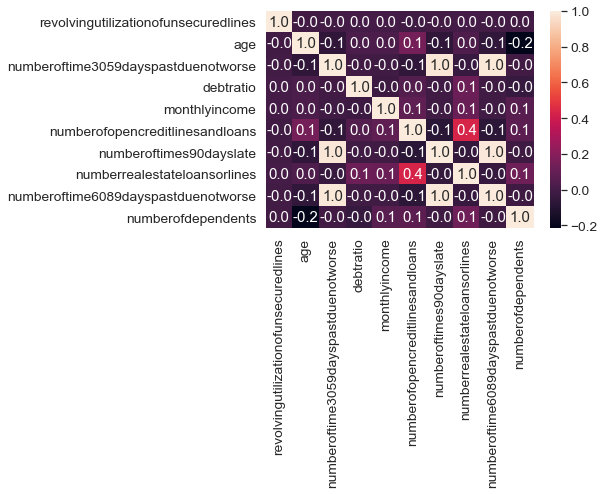

In [16]:
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f")
plt.show()

## Outliers Detection

In [17]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))
#percentile_based_outlier(data=training_data.revolvingutilizationofunsecuredlines)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [18]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold
#mad_based_outlier(points=training_data.age)

In [19]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier
#std_div(data=training_data.age)

In [20]:
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    #temp = zip(data.index, x, y, z) ## to resolve error "object of type 'zip' has no len()" https://github.com/RaRe-Technologies/gensim/issues/215
    temp = list(zip(data.index, x, y, z))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final
#outlierVote(data=training_data.age)

In [21]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

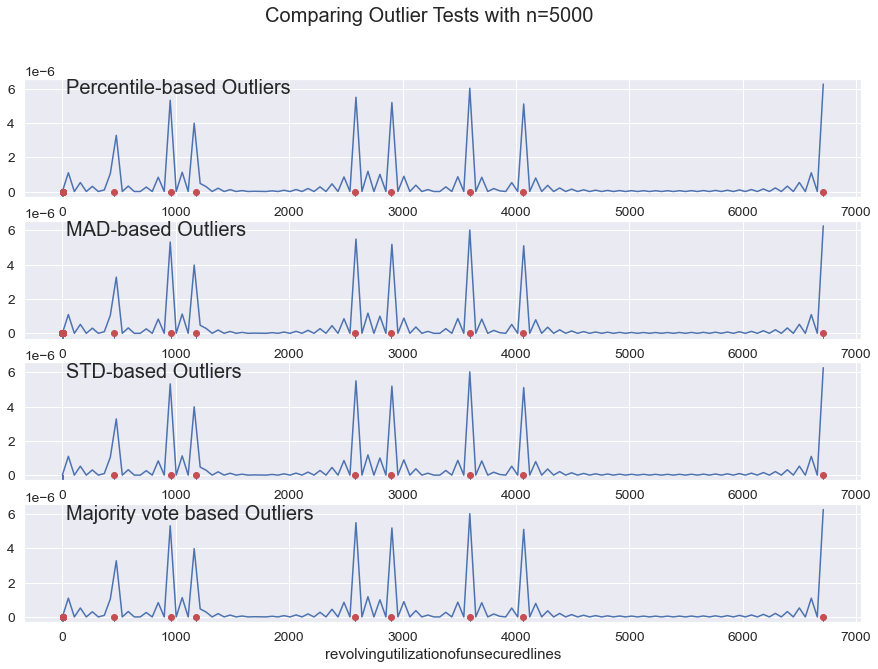

In [22]:
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

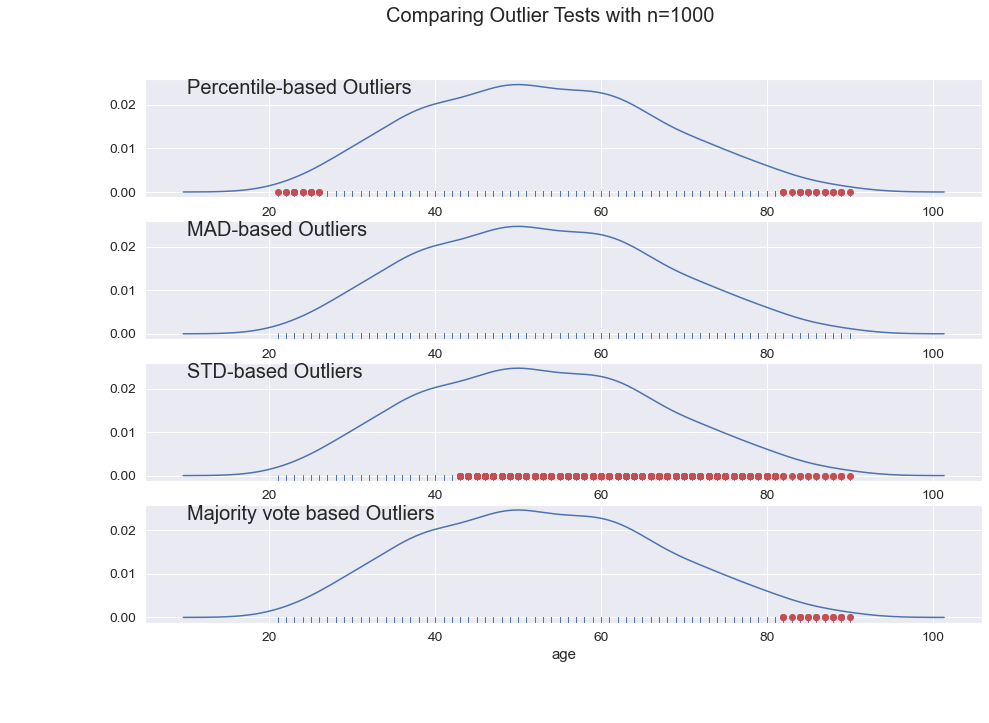

In [23]:
plotOutlier(training_data.age.sample(1000))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\

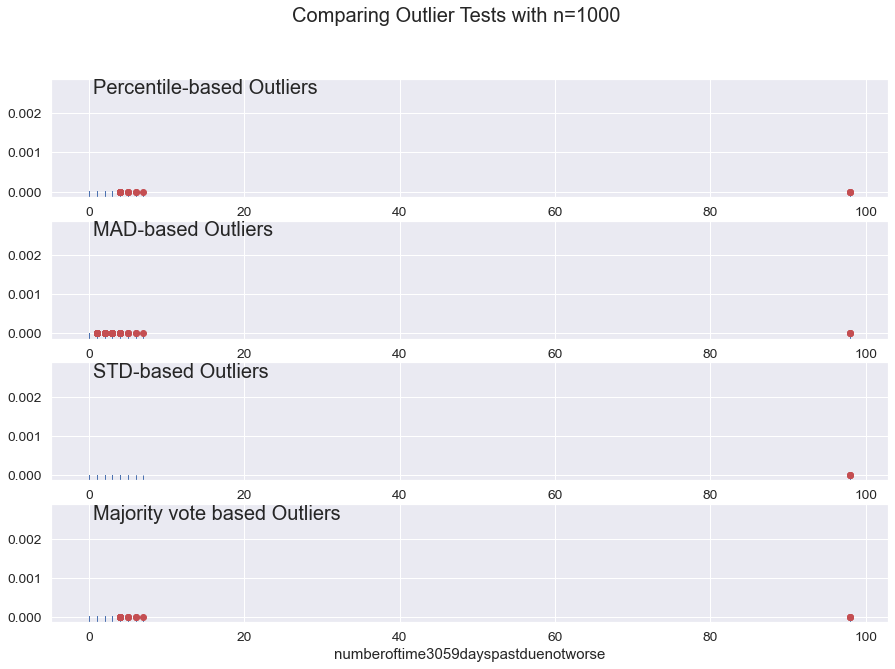

In [24]:
plotOutlier(training_data.numberoftime3059dayspastduenotworse.sample(1000))

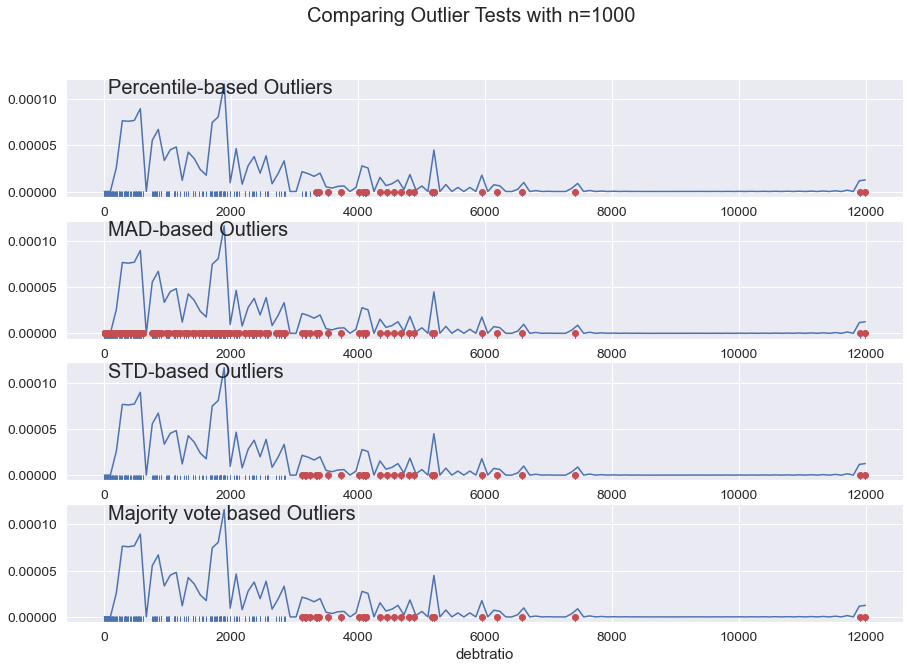

In [25]:
plotOutlier(training_data.debtratio.sample(1000))

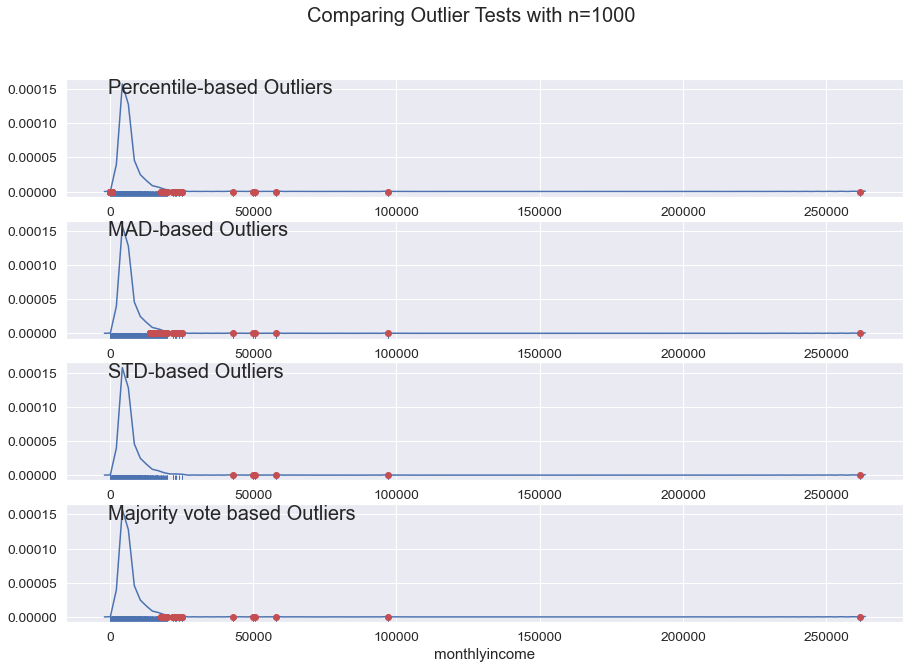

In [26]:
plotOutlier(training_data.monthlyincome.sample(1000))

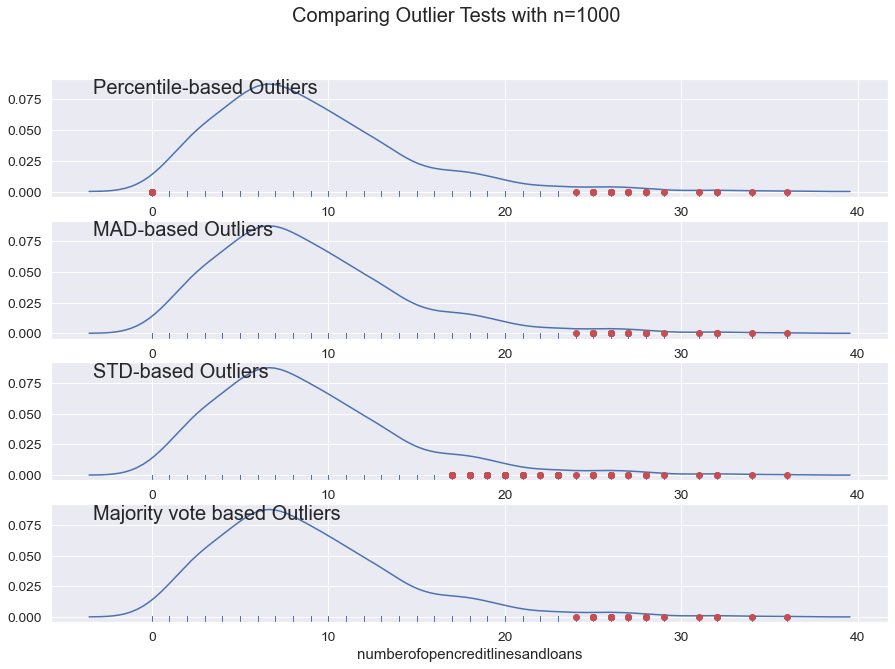

In [27]:
plotOutlier(training_data.numberofopencreditlinesandloans.sample(1000))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\

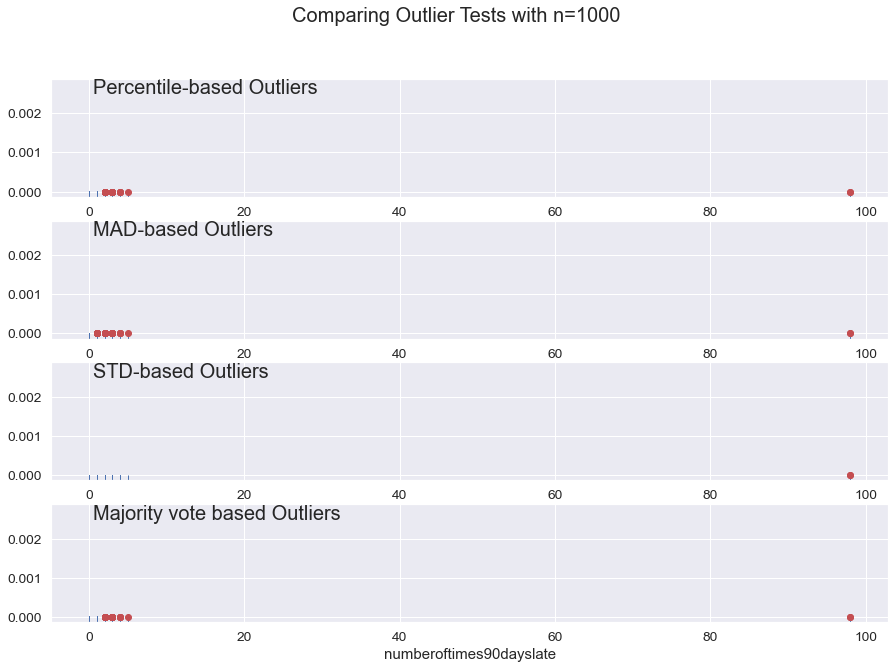

In [28]:
plotOutlier(training_data.numberoftimes90dayslate.sample(1000))

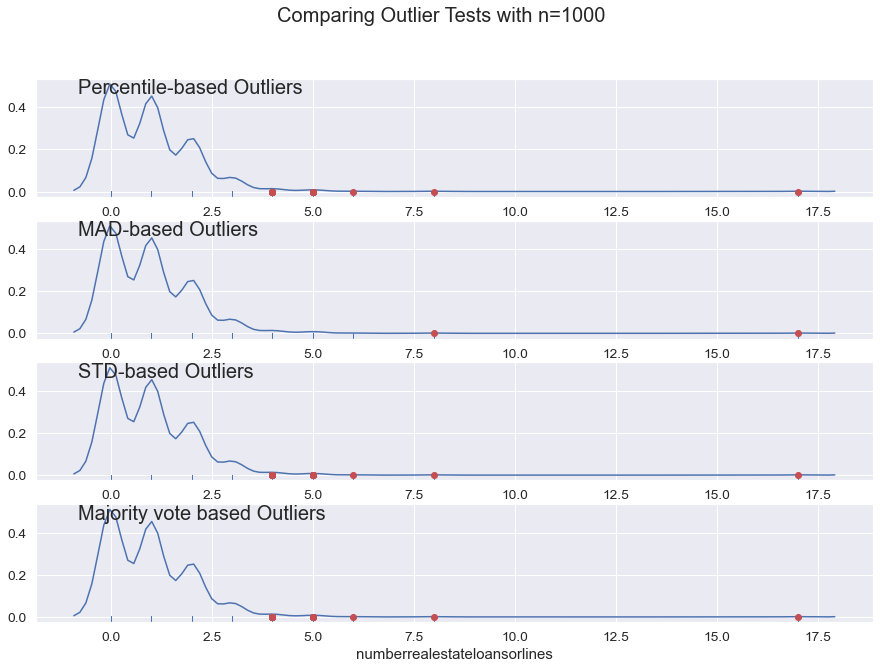

In [29]:
plotOutlier(training_data.numberrealestateloansorlines.sample(1000))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\

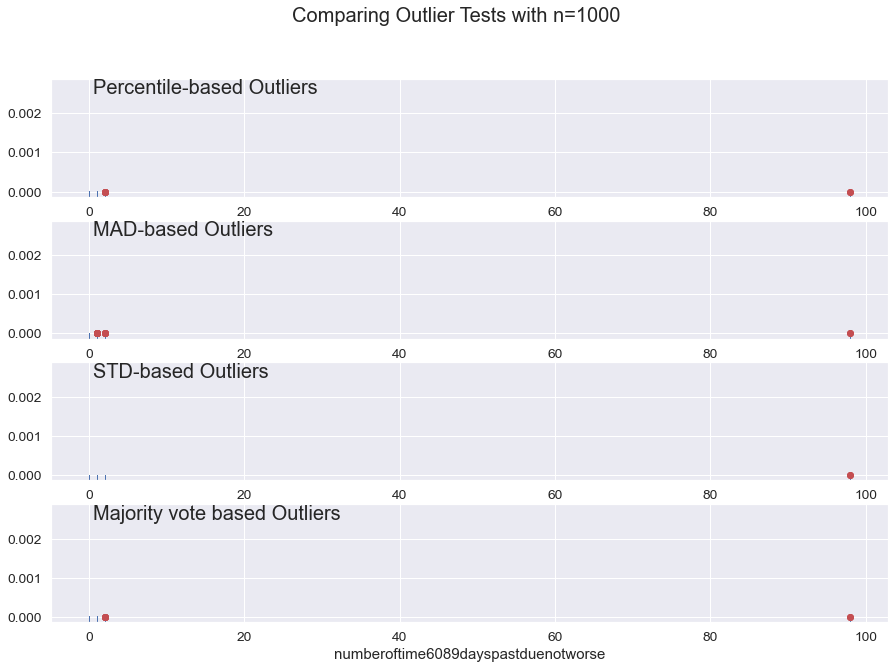

In [30]:
plotOutlier(training_data.numberoftime6089dayspastduenotworse.sample(1000))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


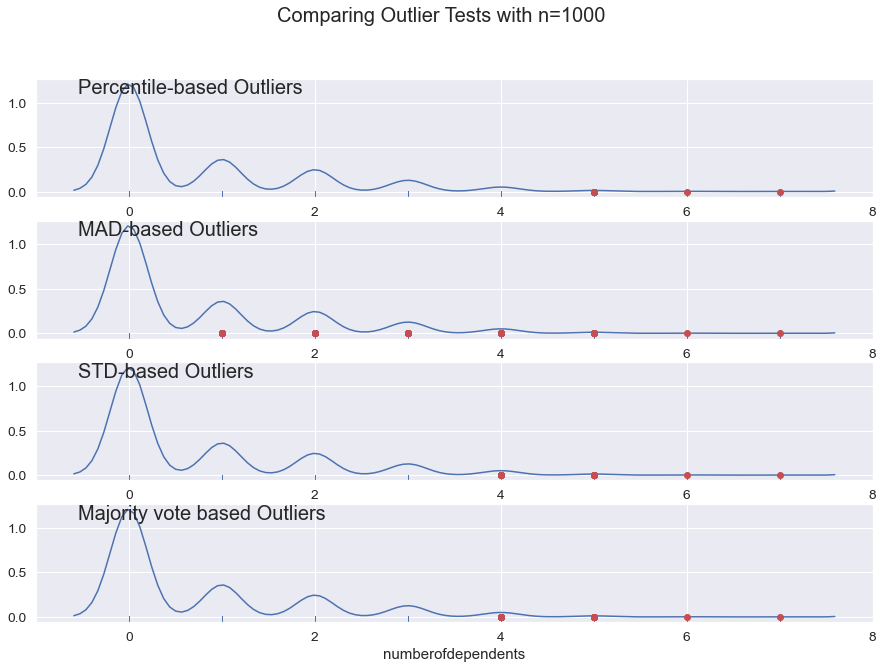

In [31]:
plotOutlier(training_data.numberofdependents.sample(1000))

## Handle the outliers

In [32]:
revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
training_data.revolvingutilizationofunsecuredlines = revNew

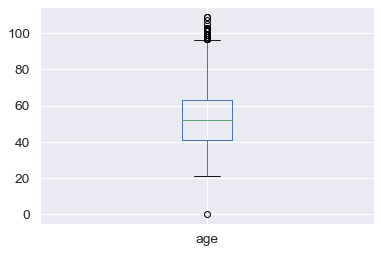

In [33]:
training_data.age.plot.box();

In [34]:
import collections
collections.Counter(training_data.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

In [35]:
ageNew = []
for val in training_data.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
training_data.age = ageNew

In [36]:
collections.Counter(training_data.numberoftime3059dayspastduenotworse)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [37]:
New = []
med = training_data.numberoftime3059dayspastduenotworse.median()
for val in training_data.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

training_data.numberoftime3059dayspastduenotworse = New

In [38]:
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
    
    return outlierDict
outlierRatio(training_data.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

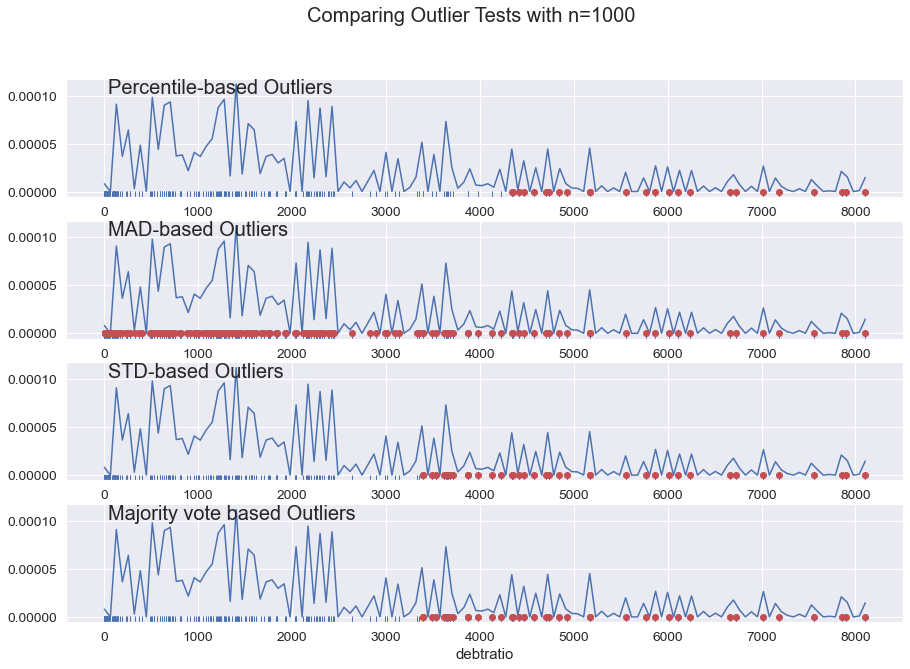

In [39]:
plotOutlier(training_data.debtratio.sample(1000))

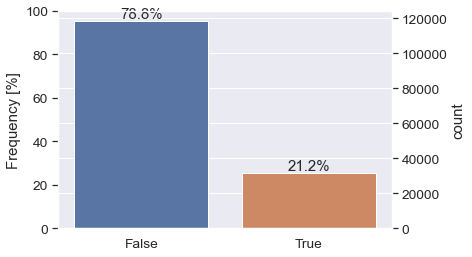

In [40]:
def add_freq():
    ncount = len(training_data)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)
ax = sns.countplot(mad_based_outlier(training_data.debtratio))

add_freq()

In [41]:
minUpperBound = min([val for (val, out) in zip(training_data.debtratio, mad_based_outlier(training_data.debtratio)) if out == True])

In [42]:
newDebtRatio = []
for val in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

training_data.debtratio = newDebtRatio

In [43]:
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        tfOutlier = zip(x, func(x))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == True]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False)
        
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('Percentile-based Outliers, removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('MAD-based Outliers, removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD-based Outliers, removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority vote based Outliers, removed: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


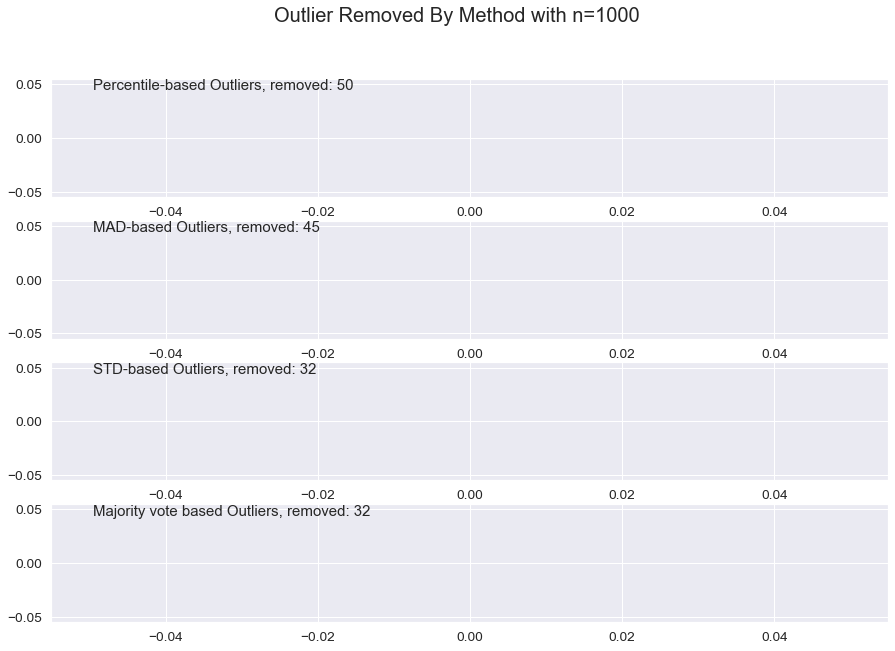

In [44]:
plotOutlierFree(training_data.monthlyincome.sample(1000))

In [45]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew

In [46]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')

In [47]:
training_data.monthlyincome = incomeNew

In [48]:
collections.Counter(training_data.numberoftimes90dayslate)


Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

In [49]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [50]:
new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)

In [51]:

training_data.numberoftimes90dayslate = new

In [52]:
collections.Counter(training_data.numberrealestateloansorlines)

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

In [53]:
realNew = []
for val in training_data.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew

In [54]:
collections.Counter(training_data.numberoftime6089dayspastduenotworse)

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

In [55]:
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse)
training_data.numberoftime6089dayspastduenotworse = new

In [56]:
collections.Counter(training_data.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [57]:
depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)

In [58]:
training_data.numberofdependents = depNew

## Feature Importance

In [59]:
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0
4,0,0.907239,49,1.0,0.024926,16867.0,7,0.0,1,0.0,0.0


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
training_data.columns[1:]

Index(['revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [62]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.189053
 2) age                            0.154817
 3) numberoftime3059dayspastduenotworse 0.150809
 4) debtratio                      0.141929
 5) monthlyincome                  0.098143
 6) numberofopencreditlinesandloans 0.088968
 7) numberoftimes90dayslate        0.050406
 8) numberrealestateloansorlines   0.044934
 9) numberoftime6089dayspastduenotworse 0.044333
10) numberofdependents             0.036607


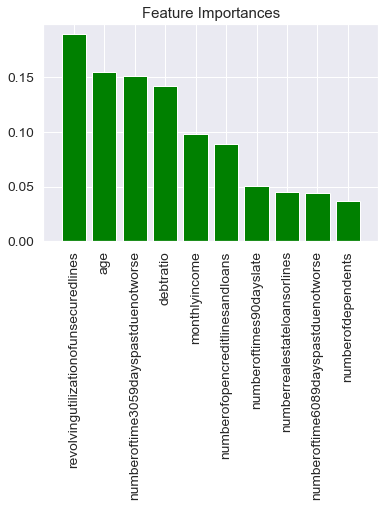

In [63]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Train and build baseline model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [65]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [67]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [68]:
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
knMod.score(X_test, y_test)

0.92896

In [70]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [71]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5814461037570924

In [72]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [73]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [74]:
glmMod.score(X_test, y_test)

0.9343733333333333

In [75]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]

In [76]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8502967573438015

In [77]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [78]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [79]:
adaMod.score(X_test, y_test)

0.9329866666666666

In [80]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [81]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8598487815969735

In [82]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [83]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [84]:
gbMod.score(X_test, y_test)

0.9347466666666666

In [85]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [86]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8643471262757343

In [87]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [88]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [89]:
rfMod.score(X_test, y_test)

0.9301066666666666

In [90]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]

In [91]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7780840967643726

## Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [93]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s finished


{'KNeighborsClassifier': [0.5955119528646755, 0.002580002563260969],
 'LogisticRegression': [0.8494731935113549, 0.003547781023077321],
 'AdaBoostClassifier': [0.8586812528322133, 0.0021126810786966793],
 'GradientBoostingClassifier': [0.8639104977019396, 0.002613618031744818],
 'RandomForestClassifier': [0.7783847101683354, 0.0030061395416131126]}

## Hyper parameter optimization using Randomized search

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### AdaBoost

In [95]:
adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [100]:
## gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
##                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)
## removed fit_params=None to solve __init__() got an unexpected keyword argument 'fit_params'
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc',  cv=None, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.8s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   4.1s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.8s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.7s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  5.0min finished


In [101]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100}, 0.8583293577622724)

### GradientBoosting

In [102]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [104]:
## gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
##                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train, y_train)
## removed fit_params=None to solve __init__() got an unexpected keyword argument 'fit_params'
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc',  cv=None, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] loss=exponential, max_depth=7, n_estimators=354 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. loss=exponential, max_depth=7, n_estimators=354, total= 1.9min
[CV] loss=exponential, max_depth=7, n_estimators=354 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV] .. loss=exponential, max_depth=7, n_estimators=354, total= 1.8min
[CV] loss=exponential, max_depth=7, n_estimators=354 .................
[CV] .. loss=exponential, max_depth=7, n_estimators=354, total= 1.8min
[CV] loss=exponential, max_depth=7, n_estimators=354 .................
[CV] .. loss=exponential, max_depth=7, n_estimators=354, total= 2.0min
[CV] loss=exponential, max_depth=7, n_estimators=354 .................
[CV] .. loss=exponential, max_depth=7, n_estimators=354, total= 2.2min
[CV] loss=deviance, max_depth=6, n_estimators=113 ....................
[CV] ..... loss=deviance, max_depth=6, n_estimators=113, total=  40.4s
[CV] loss=deviance, max_depth=6, n_estimators=113 ....................
[CV] ..... loss=deviance, max_depth=6, n_estimators=113, total=  36.0s
[CV] loss=deviance, max_depth=6, n_estimators=113 ....................
[CV] ..... loss=deviance, max_depth=6, n_estimators=113, total=  34.3s
[CV] loss=deviance, max_depth=6, n_estimators=113 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 79.0min finished


In [105]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 2, 'n_estimators': 193},
 0.8619110037443372)

### Train models with help of new hyper parameter

In [106]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [107]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [108]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.4s finished


In [109]:
cvDictbestpara

{'GradientBoostingClassifier': [0.8632135157290373, 0.0028410426553704066],
 'AdaBoostClassifier': [0.8591468159728505, 0.002580346154686282]}

In [110]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [111]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8640446366600842

In [112]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [113]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8601218171570226

### Feature Transformation

In [114]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [115]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [116]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [117]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   51.9s finished


In [118]:
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.8632111426654469, 0.0028418614450502113],
 'AdaBoostClassifier': [0.8591468159728505, 0.002580346154686282]}

In [119]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

In [120]:
X_test_transform

array([[0.11628408, 4.21950771, 0.        , ..., 0.69314718, 0.        ,
        0.69314718],
       [0.16575444, 3.55534806, 0.        , ..., 0.69314718, 0.        ,
        0.        ],
       [0.69314218, 4.07753744, 0.        , ..., 1.09861229, 0.        ,
        0.        ],
       ...,
       [0.18607404, 4.27666612, 0.        , ..., 0.69314718, 0.        ,
        0.        ],
       [0.07847826, 3.52636052, 0.        , ..., 1.60943791, 0.        ,
        0.69314718],
       [0.00561734, 4.24849524, 0.69314718, ..., 1.09861229, 0.        ,
        0.69314718]])

In [121]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [122]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8640741790999479

In [123]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [124]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8601218171570226

### Voting based ensamble model

In [125]:
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [126]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [127]:
votingMod.score(X_test_transform, y_test)

0.93464

In [129]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8640502601088091

In [130]:
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

In [131]:
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [132]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8640259986286519

### Testing on Real Test Dataset

In [134]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv('F:/Machine-Learning-Projects-master/credit_risk_evaluation/cs-test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

In [135]:
test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((training_data.median()), inplace=True)

In [136]:
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [137]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})

In [143]:
output.to_csv("F:/Machine-Learning-Projects-master/credit_risk_evaluation/predictions.csv", index=False)

In [144]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test_data)
test_data_transform = transformer.transform(test_data_temp)

In [145]:
test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [146]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})

In [147]:
output.to_csv("F:/Machine-Learning-Projects-master/credit_risk_evaluation/predictions_voting_Feature_transformation.csv", index=False)